<a href="https://colab.research.google.com/github/mahesh-keswani/pytorch-example-notebook/blob/main/5_PyTorchRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
N = 1000
# np.random.random will generate uniformly distributed data between [0,1], by multiplying 6 it will be [0,6]
# by -3, we will have the data between [-3,3] 
X = np.random.random( (N, 2) ) * 6 - 3
Y = np.cos( 2*X[:, 0] ) + np.cos( 3*X[:, 1] )
# y = cos(2x1) + cos(3x2)

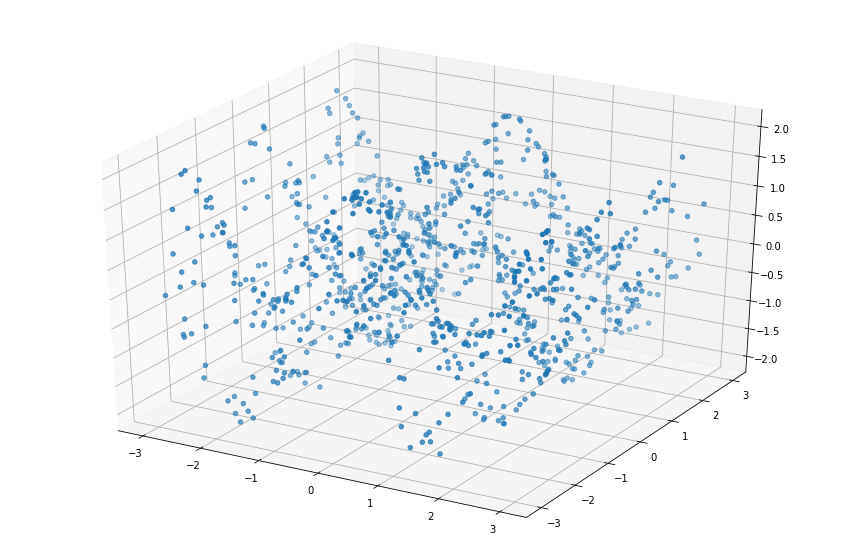

In [3]:
# Plot it
fig = plt.figure( figsize = (15, 10) )
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

In [4]:
# Lets build the model
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)
# Note there is no activation function at output with single node
criterion = nn.MSELoss()
optimizer = torch.optim.Adam( model.parameters(), lr = 0.001 )

In [5]:
X = torch.from_numpy( X.astype(np.float32) )
Y = torch.from_numpy( Y.astype(np.float32).reshape(N, -1) )

In [6]:
EPOCHS = 1000
losses = np.zeros(EPOCHS)
for epoch in range(EPOCHS):
    optimizer.zero_grad()

    outputs = model(X)
    loss = criterion(outputs, Y)
    losses[epoch] = loss.item()

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch = {epoch + 1}, Loss = {loss.item()}")

Epoch = 100, Loss = 0.8450809121131897
Epoch = 200, Loss = 0.6704906225204468
Epoch = 300, Loss = 0.5276914834976196
Epoch = 400, Loss = 0.4269968867301941
Epoch = 500, Loss = 0.3620080053806305
Epoch = 600, Loss = 0.30750027298927307
Epoch = 700, Loss = 0.24745815992355347
Epoch = 800, Loss = 0.19501833617687225
Epoch = 900, Loss = 0.135186105966568
Epoch = 1000, Loss = 0.09014152735471725


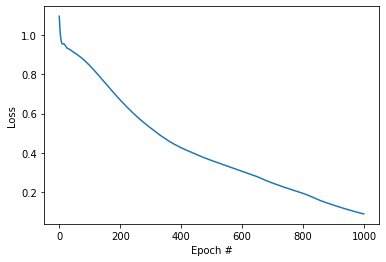

In [7]:
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.plot(losses);

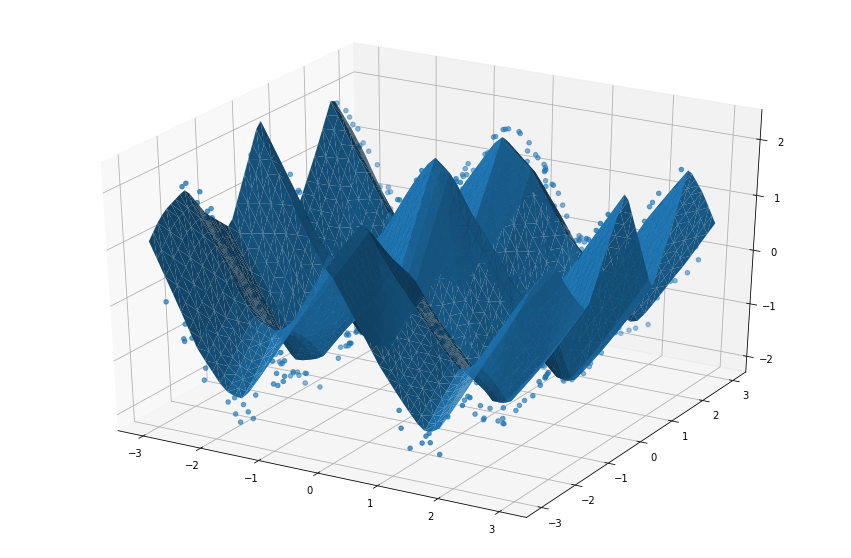

In [8]:
# Lets plot the prediction surface with the points plotted
fig = plt.figure( figsize = (15, 10) )
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
with torch.no_grad():
    # Note the range is between [-3,3] which was the range of the X used for model training
    line = np.linspace(-3, 3, 50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    Yhat = model(Xgrid_torch).numpy().flatten()
    ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)

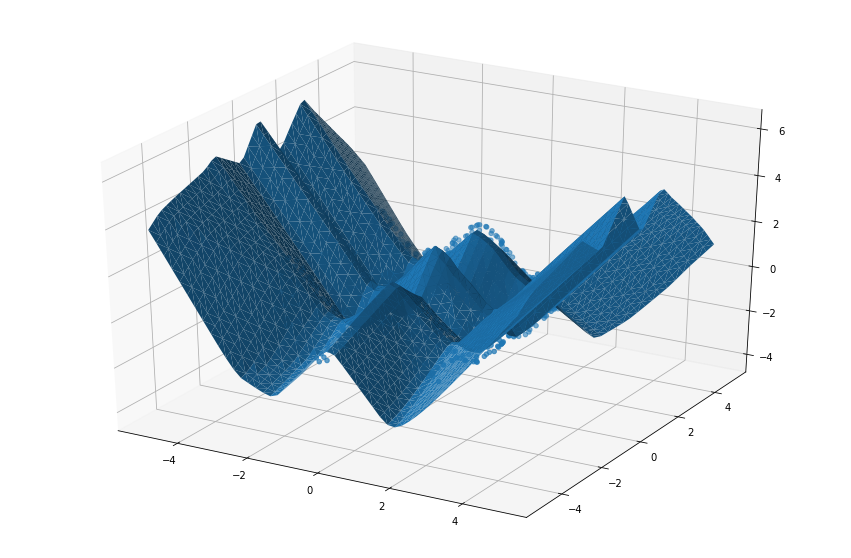

In [9]:
# Lets see whether model can handle the inputs with the range [-5, 5] and see whether it can have periodic nature like cosine
# Plot the prediction surface
fig = plt.figure( figsize = (15, 10) )
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
with torch.no_grad():
    # See the range is between [-5, 5]
    line = np.linspace(-5, 5, 50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    Yhat = model(Xgrid_torch).numpy().flatten()
    ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)

In [10]:
# We can see that model cannot have the predictions like cosine because the activation functions are not periodic in nature.